# Log Attributes (GR First Derivative)

My goal in this notebook is to create a prototype to compute first derivative of GR curve to highlight parasequence inside GR log. My expectation in the future, this attribute could help me in well correlation and sequence stratigraphy interpretation.

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lasio

In [119]:
dir = './log1.las'
well = lasio.read(dir)
well = well.df()
well = well.reset_index()

well.head()

well = well.set_axis(['DEPTH', 'CALI', 'RHOB','TVD', 'GR','NPHI', 'DT','PEF','RES1','RES2', 'SDT'],
      axis=1, inplace=False)

well.describe()

Header section Parameter regexp=~P was not found.


,DEPTH,CALI,RHOB,TVD,GR,NPHI,DT,PEF,RES1,RES2,SDT
count,15400.000000,14617.000000,14620.000000,14538.000000,14625.000000,14623.000000,14814.000000,14628.000000,14604.000000,14604.000000,14765.000000
mean,1564.925031,265.179055,2.364041,1586.058160,73.776889,0.306850,325.767085,3.078302,73.719545,34.751896,685.495336
std,666.861234,49.754933,0.358362,621.250305,27.388174,0.178738,66.466365,1.521656,2511.348312,1258.082805,265.275181
min,410.000000,212.328800,0.004600,528.190700,0.008600,0.081300,202.843100,-0.108300,0.066300,0.150400,357.551800
25%,987.462500,213.837500,2.317575,1042.345000,55.015900,0.206500,273.905425,2.520650,1.973075,2.011550,493.295800
50%,1564.925050,305.081200,2.459100,1579.928900,79.537700,0.270100,310.274950,2.943850,2.774600,2.795050,596.454300
75%,2142.387575,313.758100,2.545825,2125.064325,93.896200,0.343150,370.507125,3.274025,3.827600,3.855150,822.670800
max,2719.850100,353.601400,2.665300,2670.203600,163.369800,2.232800,532.728500,14.530700,97036.414100,70945.859400,1924.946900


In [120]:
well = well.dropna()
well.describe()

,DEPTH,CALI,RHOB,TVD,GR,NPHI,DT,PEF,RES1,RES2,SDT
count,14379.000000,14379.000000,14379.000000,14379.000000,14379.000000,14379.000000,14379.000000,14379.000000,14379.000000,14379.000000,14379.000000
mean,1617.650033,264.339213,2.395039,1574.200948,74.276207,0.297794,323.233644,2.954657,3.187406,24.680807,682.825052
std,622.650636,49.631479,0.250626,614.299258,27.137382,0.164348,63.743726,1.155607,2.055274,995.460829,265.441976
min,539.300000,212.328800,0.119700,528.190700,0.008600,0.081300,202.843100,-0.108300,0.066300,0.287600,357.551800
25%,1078.475000,213.837500,2.326850,1036.737100,56.183350,0.205550,273.618500,2.512200,1.991200,2.005900,492.921850
50%,1617.650000,303.362900,2.462500,1568.004400,79.847500,0.268000,309.021900,2.933600,2.782000,2.777200,592.743300
75%,2156.824950,313.696750,2.546900,2107.178950,94.049100,0.338800,365.980100,3.253900,3.821350,3.812150,815.274800
max,2696.000000,353.601400,2.665300,2646.352300,163.369800,2.232800,532.728500,14.530700,69.479100,60467.757800,1924.946900


(1000, 1300)

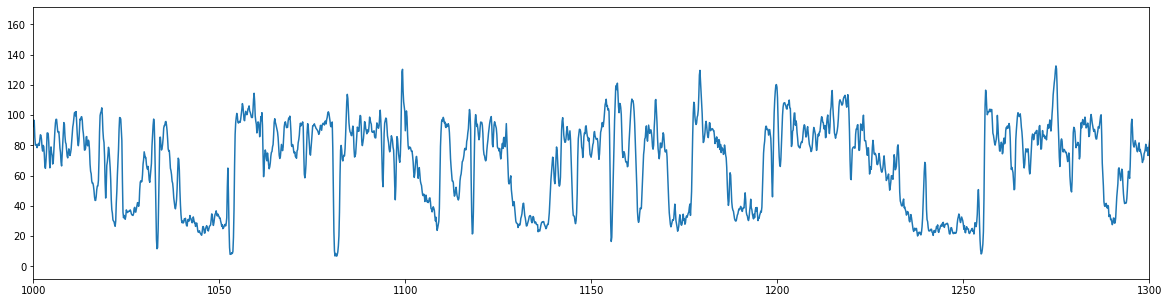

In [121]:
plt.figure(figsize=(20,5))
plt.plot(well['DEPTH'],well['GR'])
plt.xlim([1000,1300])

# Log Smoothing using pandas simple moving average

In [26]:
#First we smooth the log

SMA_GR = well.iloc[:,4].rolling(window=20).mean()
well = well.assign(SMA_GR=SMA_GR)

In [27]:
SMA_GR.shape 
'''pandas keep the smoothed column size by inserting nan value 
in the head and the tail of this thing, so be careful!'''

(14379,)

(1000, 1300)

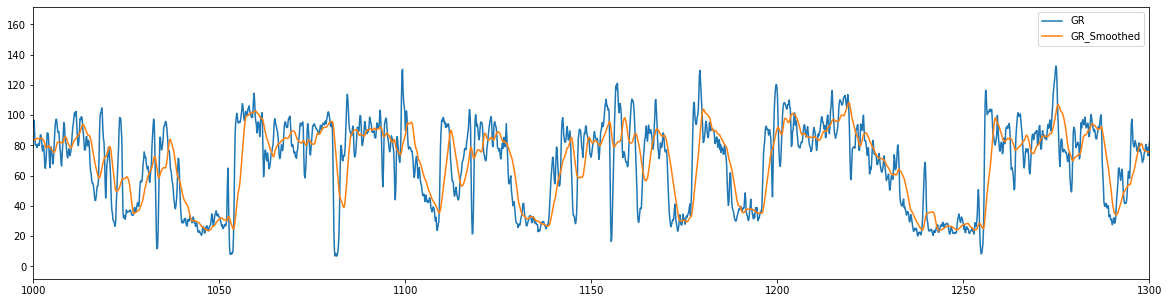

In [28]:
plt.figure(figsize=(20,5))
plt.plot(well['DEPTH'],well['GR'],label='GR')
plt.plot(well['DEPTH'],SMA_GR,label='GR_Smoothed')
plt.legend()
plt.xlim([1000,1300])

I have to discard na rows without much damaging the original data, so let's make a new dataframe to keep this simple

In [122]:
df2 = pd.DataFrame({"DEPTH":well['DEPTH'],'SMA_GR':SMA_GR})
df2 = df2.dropna()

In [123]:
df2.describe()

,DEPTH,SMA_GR
count,14360.000000,14360.000000
mean,1619.075033,74.299755
std,621.827912,22.821645
min,542.150000,0.501575
25%,1080.612500,60.924751
50%,1619.075000,78.925755
75%,2157.537475,90.611767
max,2696.000000,128.239890


In [124]:
#This code below computes numerical derivative of the smoothed GR log
fx = np.array(df2['SMA_GR'])
x = np.array(df2['DEPTH'])

dx = x[1]-x[0]
GR_der = (fx[2:]-fx[:-2])/(2*dx)


In [125]:
GR_der.shape
#boundary values get discarded (the first and the last index), be careful!

(14358,)

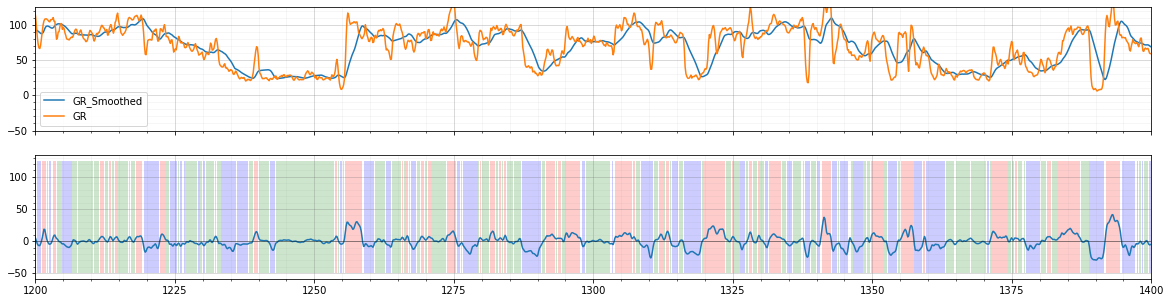

In [126]:

f,ax = plt.subplots(2,1,figsize=(20,5),sharex=True)
# plt.plot(well['DEPTH'],well['GR'],label='GR')
ax[0].plot(well['DEPTH'],SMA_GR,label='GR_Smoothed')
ax[0].plot(well['DEPTH'],well['GR'],label='GR')

# ax.fill_betweenx(x[1:-1],0,where=GR_der>0,facecolor='r',alpha=0.6)

ax[0].legend()
ax[0].set_ylim([-50,125])
ax[0].set_xlim([1200,1400])

ax[1].fill_between(x[1:-1], -50, 125,where=GR_der-0>=4,facecolor='r',alpha=0.2)
ax[1].fill_between(x[1:-1], -50, 125,where=GR_der-0<-4,facecolor='b',alpha=0.2)
ax[1].fill_between(x[1:-1], -50, 125,where=abs(GR_der-0)<4,facecolor='g',alpha=0.2)
ax[1].plot(x[1:-1],GR_der)
ax[1].axhline(y=0,xmin = 0,xmax=1300,linewidth=0.6,color='black',alpha=0.6)

for axes in ax:
    axes.minorticks_on()
    axes.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.3)
    axes.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)

# Interpretation

I think this is pretty useful to see the fining and coarsening trend from GR log, as fining GR pattern has positive gradient (red), coarsening has negative gradient (blue), and aggradation tends to have zero gradient (green).

This plot could be useful in interpreting parasequence and log correlation.